In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

# Load supervised data
df = pd.read_csv("./DATA/Supervised_dataset.csv")
df.head()
# Separate features and labels


,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Annotation,Subject,Age,Gender,Height_cm,Weight_kg,Annotation_Numeric
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,Relax,Subject1,30,M,177,94,0
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,Relax,Subject1,30,M,177,94,0
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,Relax,Subject1,30,M,177,94,0
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,Relax,Subject1,30,M,177,94,0
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,Relax,Subject1,30,M,177,94,0


In [3]:
# Unsupervised dataset


df2=pd.read_csv('./DATA/windowed_features.csv')
df2.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean
0,-0.782714,0.395262,-1.045836,0.370070,0.365992
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821


In [4]:
df['Acc_magnitude']=np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)  

In [5]:
df.drop(columns=['AccX', 'AccY', 'AccZ','Gender','Height_cm','Weight_kg','Subject'], inplace=True)

In [6]:
df.rename(columns={'Annotation_Numeric': 'label'}, inplace=True)

In [7]:
df.head()

,SpO2,HR,Temp,EDA,Annotation,Age,label,Acc_magnitude
0,96.999969,89.000763,30.100043,0.083039,Relax,30,0,1.159528
1,96.999969,88.000137,30.100043,0.081028,Relax,30,0,1.153905
2,96.999969,87.000443,30.100043,0.083039,Relax,30,0,1.153905
3,96.999969,87.000443,30.100043,0.083039,Relax,30,0,1.160558
4,96.999969,87.000443,30.100043,0.081028,Relax,30,0,1.152042


In [8]:
df.drop(columns=['Annotation'], inplace=True)

In [9]:
features = df.drop('label', axis=1)
labels = df['label'].values

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Add label back for windowing
df_scaled['label'] = labels

# Set window size
window_size = 30
num_windows = len(df_scaled) // window_size

windowed_features = []
windowed_labels = []

for i in range(num_windows):
    window = df_scaled.iloc[i*window_size : (i+1)*window_size]
    
    # Only mean features
    means = window.drop('label', axis=1).mean().values
    
    # Label: majority vote in the window
    label = mode(window['label'], keepdims=False).mode.item()
    
    windowed_features.append(means)
    windowed_labels.append(label)

# Create DataFrame
columns = [f"{col}_mean" for col in features.columns]
windowed_df = pd.DataFrame(windowed_features, columns=columns)
windowed_df['label'] = windowed_labels

# Save result
windowed_df.to_csv("Supervised_windowed.csv", index=False)


In [10]:
# Supervised windowed dataset
df3=pd.read_csv('./DATA/Supervised_windowed.csv')

In [11]:
df3.shape

(1536, 7)

In [12]:
df2.shape

(1536, 5)

In [13]:
df3.head()

,SpO2_mean,HR_mean,Temp_mean,EDA_mean,Age_mean,Acc_magnitude_mean,label
0,0.370070,0.395262,-1.045836,-0.782714,1.069476,0.365992,0
1,0.292252,-0.073149,-0.782789,-0.782401,1.069476,0.349516,0
2,0.389524,-0.497982,-0.594906,-0.781311,1.069476,-0.384603,0
3,-0.213562,-0.386874,-0.432073,-0.780996,1.069476,-0.536413,0
4,-0.019018,-0.404306,-0.319343,-0.780714,1.069476,-0.533821,0


In [14]:
df3.drop(columns=['Age_mean'], inplace=True)

In [15]:
df3.head()

,SpO2_mean,HR_mean,Temp_mean,EDA_mean,Acc_magnitude_mean,label
0,0.370070,0.395262,-1.045836,-0.782714,0.365992,0
1,0.292252,-0.073149,-0.782789,-0.782401,0.349516,0
2,0.389524,-0.497982,-0.594906,-0.781311,-0.384603,0
3,-0.213562,-0.386874,-0.432073,-0.780996,-0.536413,0
4,-0.019018,-0.404306,-0.319343,-0.780714,-0.533821,0


In [16]:
df3['label'].value_counts()

label
0    800
2    277
3    239
1    220
Name: count, dtype: int64

In [17]:
df2.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean
0,-0.782714,0.395262,-1.045836,0.370070,0.365992
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821


In [18]:
feature_cols = ['SpO2_mean', 'HR_mean', 'Temp_mean', 'EDA_mean', 'Acc_magnitude_mean']
supervised_df = df3[feature_cols + ['label']]
unsupervised_df = df2[feature_cols]

In [19]:
# Separate features and labels
X_supervised = df3[feature_cols]
y_supervised = df3['label']

X_unsupervised = df2.copy()
y_unsupervised = np.full(X_unsupervised.shape[0], -1)  # unlabeled

# Combine
X_all = pd.concat([X_supervised, X_unsupervised], ignore_index=True)
y_all = np.concatenate([y_supervised, y_unsupervised])


In [20]:
X_all.shape

(3072, 5)

In [21]:
X_all.head()

,SpO2_mean,HR_mean,Temp_mean,EDA_mean,Acc_magnitude_mean
0,0.370070,0.395262,-1.045836,-0.782714,0.365992
1,0.292252,-0.073149,-0.782789,-0.782401,0.349516
2,0.389524,-0.497982,-0.594906,-0.781311,-0.384603
3,-0.213562,-0.386874,-0.432073,-0.780996,-0.536413
4,-0.019018,-0.404306,-0.319343,-0.780714,-0.533821


In [22]:
y_all.shape

(3072,)

In [23]:
from sklearn.semi_supervised import LabelSpreading

label_spread = LabelSpreading(kernel='rbf', alpha=0.2)
label_spread.fit(X_all, y_all)
predicted_labels = label_spread.transduction_
probs = label_spread.label_distributions_
confidences = probs.max(axis=1)
high_conf_mask = (y_all == -1) & (confidences > 0.9)


In [24]:
pseudo_df = X_all.iloc[high_conf_mask].copy()
pseudo_df['label'] = predicted_labels[high_conf_mask]

final_data = pd.concat([supervised_df, pseudo_df], ignore_index=True)


In [25]:
pseudo_df = X_all.iloc[high_conf_mask].copy()
pseudo_df['label'] = predicted_labels[high_conf_mask]

final_data = pd.concat([supervised_df, pseudo_df], ignore_index=True)


In [26]:
pseudo_df.shape

(1304, 6)

In [27]:
final_data.shape

(2840, 6)

In [28]:
df2['predicted_label'] = predicted_labels[y_all == -1]
df2.to_csv("unlabeled_with_predictions.csv", index=False)


In [29]:
df2.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean,predicted_label
0,-0.782714,0.395262,-1.045836,0.370070,0.365992,0
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516,0
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603,0
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413,0
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821,0


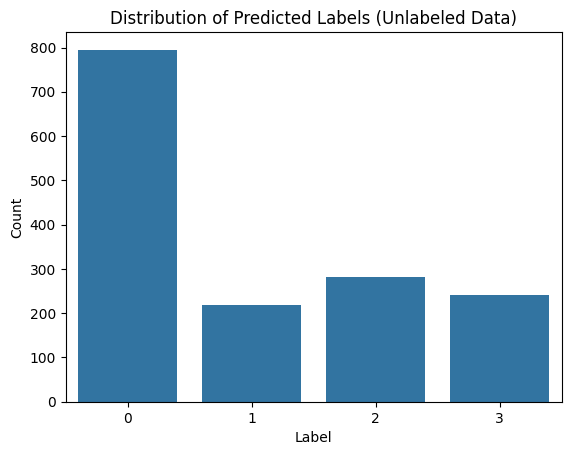

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize predicted labels
sns.countplot(x='predicted_label', data=df2)
plt.title("Distribution of Predicted Labels (Unlabeled Data)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


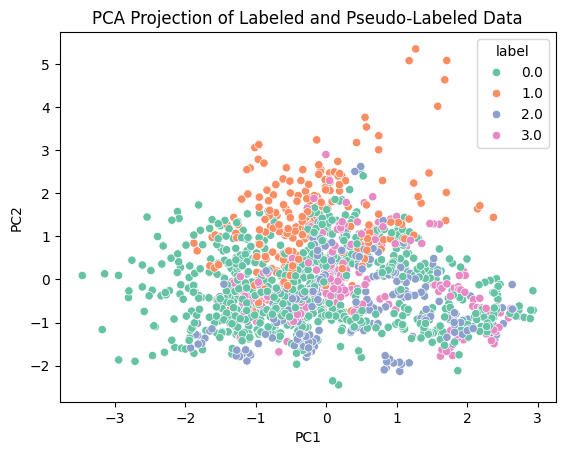

In [31]:
from sklearn.decomposition import PCA

# Optional: combine original + pseudo-labeled
combined_df = pd.concat([
    supervised_df,
    unsupervised_df.rename(columns={'predicted_label': 'label'})
], ignore_index=True)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(combined_df[feature_cols])
combined_df['PC1'] = X_pca[:, 0]
combined_df['PC2'] = X_pca[:, 1]

# Plot
sns.scatterplot(data=combined_df, x='PC1', y='PC2', hue='label', palette='Set2')
plt.title("PCA Projection of Labeled and Pseudo-Labeled Data")
plt.show()


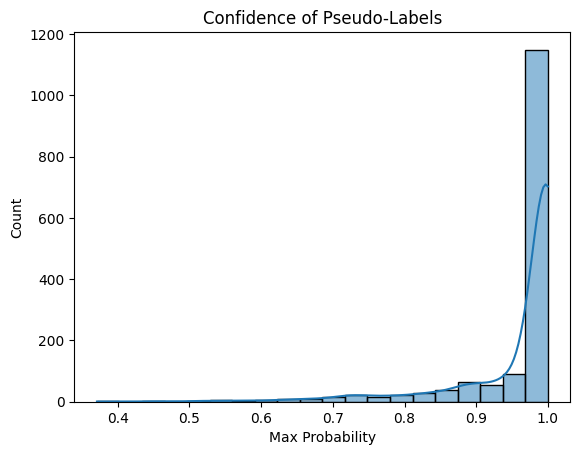

In [32]:
# Get label distributions
label_distributions = label_spread.label_distributions_

# Get max probability for each prediction (confidence)
pseudo_confidences = label_distributions[len(y_supervised):].max(axis=1)

# Visualize confidence
sns.histplot(pseudo_confidences, bins=20, kde=True)
plt.title("Confidence of Pseudo-Labels")
plt.xlabel("Max Probability")
plt.ylabel("Count")
plt.show()


In [33]:
df2['predicted_label'].value_counts()

predicted_label
0    795
2    282
3    240
1    219
Name: count, dtype: int64

In [34]:
df2.isnull().sum()

EDA_mean              0
HR_mean               0
Temp_mean             0
SpO2_mean             0
Acc_magnitude_mean    0
predicted_label       0
dtype: int64

In [35]:
df2.head()

,EDA_mean,HR_mean,Temp_mean,SpO2_mean,Acc_magnitude_mean,predicted_label
0,-0.782714,0.395262,-1.045836,0.370070,0.365992,0
1,-0.782401,-0.073149,-0.782789,0.292252,0.349516,0
2,-0.781311,-0.497982,-0.594906,0.389524,-0.384603,0
3,-0.780996,-0.386874,-0.432073,-0.213562,-0.536413,0
4,-0.780714,-0.404306,-0.319343,-0.019018,-0.533821,0


In [36]:
df3['label'].value_counts()

label
0    800
2    277
3    239
1    220
Name: count, dtype: int64

In [37]:
df3.isnull().sum()

SpO2_mean             0
HR_mean               0
Temp_mean             0
EDA_mean              0
Acc_magnitude_mean    0
label                 0
dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = final_data[feature_cols]
y = final_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.91      0.78       302
           1       0.64      0.54      0.59        83
           2       0.60      0.25      0.36        95
           3       0.57      0.35      0.44        88

    accuracy                           0.66       568
   macro avg       0.63      0.52      0.54       568
weighted avg       0.65      0.66      0.63       568



In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)   

RandomForestClassifier(random_state=42)

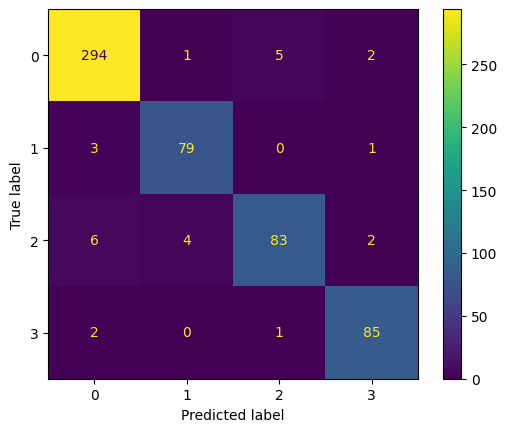

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)


In [41]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       302
           1       0.94      0.95      0.95        83
           2       0.93      0.87      0.90        95
           3       0.94      0.97      0.96        88

    accuracy                           0.95       568
   macro avg       0.95      0.94      0.94       568
weighted avg       0.95      0.95      0.95       568



In [42]:
from xgboost import XGBClassifier
xgb=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)    
print(classification_report(y_test, y_pred))    
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)   
print(f"Accuracy: {accuracy:.2f}")
  

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       302
           1       0.96      0.95      0.96        83
           2       0.93      0.87      0.90        95
           3       0.92      0.94      0.93        88

    accuracy                           0.95       568
   macro avg       0.94      0.94      0.94       568
weighted avg       0.95      0.95      0.95       568

Accuracy: 0.95


# Supervised data evaluation

In [43]:
sdf=pd.read_csv('./DATA/Supervised_windowed.csv')       
sdf.head()

,SpO2_mean,HR_mean,Temp_mean,EDA_mean,Age_mean,Acc_magnitude_mean,label
0,0.370070,0.395262,-1.045836,-0.782714,1.069476,0.365992,0
1,0.292252,-0.073149,-0.782789,-0.782401,1.069476,0.349516,0
2,0.389524,-0.497982,-0.594906,-0.781311,1.069476,-0.384603,0
3,-0.213562,-0.386874,-0.432073,-0.780996,1.069476,-0.536413,0
4,-0.019018,-0.404306,-0.319343,-0.780714,1.069476,-0.533821,0


In [44]:
X= sdf[feature_cols]
y = sdf['label']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)   
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.85      0.72       160
           1       0.67      0.41      0.51        44
           2       0.57      0.36      0.44        56
           3       0.54      0.29      0.38        48

    accuracy                           0.61       308
   macro avg       0.60      0.48      0.51       308
weighted avg       0.60      0.61      0.58       308



In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       160
           1       0.86      0.68      0.76        44
           2       0.88      0.77      0.82        56
           3       0.82      0.85      0.84        48

    accuracy                           0.84       308
   macro avg       0.85      0.80      0.82       308
weighted avg       0.85      0.84      0.84       308



In [49]:
from xgboost import XGBClassifier
xgb=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)    
print(classification_report(y_test, y_pred))    
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)   
print(f"Accuracy: {accuracy:.2f}")
  

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       160
           1       0.89      0.70      0.78        44
           2       0.81      0.77      0.79        56
           3       0.82      0.77      0.80        48

    accuracy                           0.84       308
   macro avg       0.84      0.79      0.81       308
weighted avg       0.84      0.84      0.84       308

Accuracy: 0.84


# ANN

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

X = final_data.drop(columns=['label'])
y = final_data['label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [51]:
! pip install keras-tuner



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import matplotlib.pyplot as plt

# Load and prepare data
X = final_data.drop(columns=['label'])
y = final_data['label']

# Encode and one-hot labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hypermodel
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', 64, 256, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout1', 0.1, 0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units2', 32, 128, step=32),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout2', 0.1, 0.5, step=0.1)))

    model.add(Dense(y_cat.shape[1], activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Set up tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='semi_supervised_ann'
)

# Run search
tuner.search(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Best Test Accuracy: {accuracy:.4f}")

# Training history
best_hyperparams = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
print(best_hyperparams.values)

# Optional: Save model
# best_model.save("best_ann_model.h5")


Reloading Tuner from kt_dir\semi_supervised_ann\tuner0.json



c:\Users\sudee\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\sudee\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8369 - loss: 0.4887   
Best Test Accuracy: 0.8222
Best Hyperparameters:
{'units1': 96, 'dropout1': 0.5, 'units2': 96, 'dropout2': 0.30000000000000004, 'lr': 0.004057212203732938}
